In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(100)

In [145]:
# params
lr = 0.0001
n_layers = 1
n_epochs = 20

In [ ]:
# i want to do 3 tests
# 1. increase of dimension
# 2. increase of the degree of poly
# 3. increase of local compositionality

In [243]:
def get_f(n_input,degree, n_samples = 60000):
    # polynomial definition of the kind (colum sum of x )^ k 
    X = np.random.uniform(-1,1, n_input*n_samples)
    X = np.reshape(X, (-1,n_input))
    Y = np.sum(X, axis=1)**degree
    dataset = np.column_stack((X,Y))
    return dataset

In [272]:
def deep(x,y, weights, biases, n_layers = 1,act = tf.nn.relu):
    """
    x: tensor placeholder of size [batch_size, input_dim]
    y: tensor placeholder of size [batch_size, output_dim]
    w: dict of weight matrices, indexed by n_layer. Weight matrix of DNN of size [h_size, h_size]
    b: dict of vector biases, indxed by _nlayer. Bias vector of DNN of size [h_size] 
    """
    keys = sorted(w.keys())
    layer = x
    layers = []
    # building network
    for i in np.arange(n_layers):
        layer = tf.nn.softplus(tf.add(tf.matmul(layer,w[keys[i]]), b[keys[i]]))
        layers.append(layer)
    output = tf.add(tf.matmul(layers[-1], w['out']), b['out'])
    
    # computing MSE
    loss = tf.reduce_mean((output - y)**2)
    
    # minimize loss function using a variation of SGD
    train_step = tf.train.AdamOptimizer(learning_rate=lr).minimize(loss)
    return loss, train_step

In [ ]:
def params_init(n_input,h_size):
    """
    n_input: dim of x
    h_size: dim of hidden layer, i.e. n of neurons
    """
    # using implicity xavier initializer. Which sample the inizialization of each weight according to
    # normal with variance given 1/ Number of input neurons
    # this is done to preserve the forward signal as much as possible
    
    w = {
        'h1' : tf.get_variable(dtype=tf.float32, shape=[n_input, h_size],name = 'h1'),
        'h2' : tf.get_variable(dtype=tf.float32, shape=[h_size, h_size],name = 'h2'),
        'h3' : tf.get_variable(dtype=tf.float32, shape=[h_size, h_size],name = 'h3'),
        'out' : tf.get_variable(dtype=tf.float32, shape=[h_size, 1],name = 'out'),
    b = {
        'h1': tf.Variable(tf.zeros([h_size])),
        'h2': tf.Variable(tf.zeros([h_size])),
        'h3': tf.Variable(tf.zeros([h_size])),
        'out': tf.Variable(tf.zeros([1]))
    }

    return w, b

In [273]:
def train(dataset,x,y,train_op, loss_op,batch_size = 3000, n_trials = 5):
    
    step = 0
    idx = np.arange(len(dataset))
    total_loss = []
    size = dataset.shape[1]-1
    for t in np.arange(n_trials):
        losses = []
        for i in np.arange(n_epochs):
            for _ in np.arange(20):
                
                # random minibatch sample
                sample_idx = np.random.choice(idx, batch_size)
                feed_dict = {
                    x: dataset[sample_idx][:,:size],
                    y: np.reshape(dataset[sample_idx][:, size], (-1,1))
                }
                # run the newtork
                _, loss = sess.run([train_op,loss_op], feed_dict =feed_dict)
                step += 1
            losses.append(loss)
        # append the average of the losses occured in n_epochs
        total_loss.append(np.mean(losses))
    # return best training and the total number of steps
    return np.min(total_loss), step

In [514]:
n_poly = np.arange(2, 5)
k_poly = np.arange(2, 5)

In [275]:
# number of neuron to try for each architecture
h_sizes  = {
    'h1':[24,48, 72],
    'h2':[12, 24, 36],
    'h3':[8, 16, 24]
}
h_keys = sorted(h_sizes.keys())

In [515]:
df_list = []

In [516]:
"""
Using a NN of fixed number of paramaters, to approximate a polynomial of n variables and degree 
For NN with 1, 2 and 3 hidden layers.

"""

for n in n_poly:
    for k in k_poly:
        poly_list.append((n,k))
        dataset  = get_f(n,k)
        print('True poly of k {} and dim {}'.format(k,n))
        
        df = pd.DataFrame()
        
        for i in np.arange(len(h_keys)):
            
            h_size = h_sizes[h_keys[i]]
            
            n_layer = i+1
            
            losses = []

            for h in h_size:
                
                tf.reset_default_graph()
                sess = tf.Session()            
                
                # initialize w and b
                w, b =  params_init(n, h)
                x = tf.placeholder("float", [None, n])
                y = tf.placeholder("float", [None, 1])    
            
                loss_op, train_op = deep(x,y,w, b, n_layers=n_layer)
                sess.run(tf.global_variables_initializer())
                
                # get best of training, and total number of steps
                loss, step = train(dataset, x, y, sh_train, sh_loss)
                
                print('h of size {}, with loss {} and total steps {}'.format(h,loss, step))

                losses.append(loss)
                steps.append(step)
                sess.close()
            df[i] = losses

        df_list.append(df)

true poly of k2 in n var 2
h of size 24, with loss 0.3789772391319275 and total steps 4000
h of size 48, with loss 0.4133397936820984 and total steps 4000
h of size 72, with loss 0.3488385081291199 and total steps 4000
h of size 12, with loss 0.5455536842346191 and total steps 4000
h of size 24, with loss 0.051045048981904984 and total steps 4000
h of size 36, with loss 0.24530482292175293 and total steps 4000
h of size 8, with loss 0.4963828921318054 and total steps 4000
h of size 16, with loss 0.041524700820446014 and total steps 4000
h of size 24, with loss 0.19971172511577606 and total steps 4000
true poly of k3 in n var 2
h of size 24, with loss 0.6139726638793945 and total steps 4000
h of size 48, with loss 0.590933620929718 and total steps 4000
h of size 72, with loss 0.5833229422569275 and total steps 4000
h of size 12, with loss 0.5988036394119263 and total steps 4000
h of size 24, with loss 0.5954123735427856 and total steps 4000
h of size 36, with loss 0.5883530378341675 and

In [519]:
df = pd.concat(df_list)
df = df.rename({0:'24', 1:'48', 2:'72'},columns={0:'h1',1:'h2', 2:'h3'})
df.to_pickle('exp_1.pkl')

In [ ]:
df_list = []
for t, df in zip(true_poly, df_list):
    if t[0] == 4:
        df = df.rename({0:'24', 1:'48', 2:'72'},columns={0:'h1',1:'h2', 2:'h3'})
        df_list.append(df)

In [891]:
true_poly = poly_list[81:]

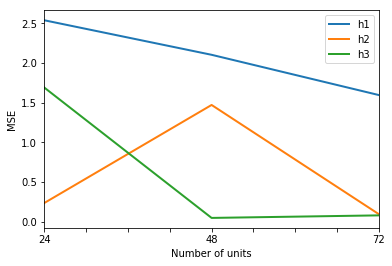

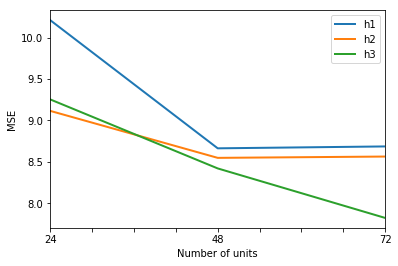

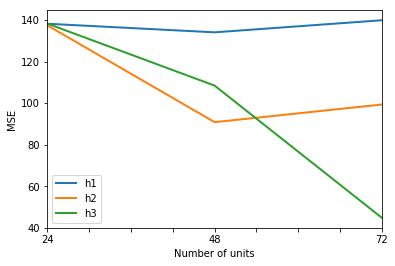

In [911]:
for c, plot in zip(true_poly[6:],plot_list):
    title = '$P_{}^{}$'.format(c[0],c[1])
    plot = plot.rename({0:'24', 1:'48', 2:'72'},columns={0:'layer_1',1:'layer_2', 2:'layer_3'})
    ax = plot.plot(lw = 2)
    ax.set_ylabel('MSE')
    ax.set_xlabel('Number of units')
    fig = ax.get_figure()
    fig.savefig('f_dimension{}.png'.format(c[1]))
plt.show()

In [748]:
power_2 = np.arange(2,10, 1)

In [758]:
eps = 0.05

In [765]:
df_list = []
poly_list = []
for n in n_poly:
    for k in k_poly:
        poly_list.append((n,k))
        dataset  = get_f(n,k)
        print('true poly of k{} in n var {}'.format(k,n))
        df = pd.DataFrame()
        
        for i in np.arange(3):
            n_layer = i+1
            stop = False
            losses = []
            total_step = 0
            p = 0
            while not stop:
                tf.reset_default_graph()
                sess = tf.Session()            
                h =  int((3*2**(power_2[p]))/n_layer)
                w, b =  params_init(n, h)
                x = tf.placeholder("float", [None, n])
                y = tf.placeholder("float", [None, 1])    

                sh_loss, sh_train = deep(x,y,w, b, n_layers = n_layer)
                sess.run(tf.global_variables_initializer())

                loss, step = train(dataset,x,y,sh_train, sh_loss)
                total_step += step
                if loss < eps:
                    print('h of size {}, with loss {} and total steps {}'.format(h,loss, step))
                    losses.append(loss)
                    steps.append(step)
                    sess.close()
                    stop = True
                elif p+1 > 7 or total_step > 50000:
                    losses.append(loss)
                    stop = True
                else:
                    print('last h  {} and total steps {}'.format(h, total_step))
                    p+=1

            df[i] = losses

        df_list.append(df)

true poly of k2 in n var 2
last h  12 and total steps 4000
last h  24 and total steps 8000
last h  48 and total steps 12000
last h  96 and total steps 16000
last h  192 and total steps 20000
last h  384 and total steps 24000
last h  768 and total steps 28000
h of size 1536, with loss 0.03707662969827652 and total steps 4000
last h  6 and total steps 4000
last h  12 and total steps 8000
last h  24 and total steps 12000
h of size 48, with loss 0.029309425503015518 and total steps 4000
last h  4 and total steps 4000
last h  8 and total steps 8000
last h  16 and total steps 12000
h of size 32, with loss 0.0028788489289581776 and total steps 4000
true poly of k3 in n var 2
last h  12 and total steps 4000
last h  24 and total steps 8000
last h  48 and total steps 12000
last h  96 and total steps 16000
last h  192 and total steps 20000
last h  384 and total steps 24000
last h  768 and total steps 28000
last h  6 and total steps 4000
last h  12 and total steps 8000
last h  24 and total steps 1

In [830]:
final_df = []
for k,p in zip(df_list,poly_list[81:]):
    if not k.empty:
        row_name = 'poly_n{}_k{}'.format(p[0], p[1])
        k = k.rename({0:row_name})
        final_df.append(k)
final_df = pd.concat(final_df)
final_df = final_df.rename(columns={0:'h1',1:'h2', 2:'h3'})

In [879]:
n_hidden_units = [1536, 48, 32, 1536, 768, 64, 1536, 12, 32, 1536, 1536, 256, 1536, 96, 32]

In [886]:
df_h = pd.DataFrame(np.reshape(n_hidden_units, (5, -1)),index=final_df.index.copy())
df_h = df_h.rename(columns={0:'h1',1:'h2', 2:'h3'})

In [909]:
print(df_h.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &    h1 &    h2 &   h3 \\
\midrule
poly\_n2\_k2 &  1536 &    48 &   32 \\
poly\_n2\_k4 &  1536 &   768 &   64 \\
poly\_n3\_k2 &  1536 &    12 &   32 \\
poly\_n3\_k4 &  1536 &  1536 &  256 \\
poly\_n4\_k2 &  1536 &    96 &   32 \\
\bottomrule
\end{tabular}



In [910]:
print(final_df.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &        h1 &        h2 &        h3 \\
\midrule
poly\_n2\_k2 &  0.037077 &  0.029309 &  0.002879 \\
poly\_n2\_k4 &       NaN &  0.028227 &  0.024637 \\
poly\_n3\_k2 &  0.031377 &  0.038649 &  0.006323 \\
poly\_n3\_k4 &       NaN &       NaN &  0.039333 \\
poly\_n4\_k2 &  0.011292 &  0.024187 &  0.022273 \\
\bottomrule
\end{tabular}



## Experiment
In order to evalulate the theoretical results got from Theorem 1, we construct the following experiments. Let $P_n^k$ be a polynomial in n variables of degree k. Let $Dn_{N,l}$ be a feedforward neural network with N neuron per layer, and l be the number of layer. The general training procedure adopted in both of the experiment is as follow, for each $P_n^k$ where $n,k \in \{2, 3, 4\}$ we generated a dataset made of m = 60.000 samples, which is given to Network respectively $l \in {1,2,3}$ in randomly sampled minibatch of 3.000, for 20 epochs, which minimize $\frac{1}{m} \sum_{m=1}^M (\hat{y} - y)^2$ using Adam Optimizer with fixed learning rate (lr = 0.001). We repeat this process for 5 trial, and pick the minimum loss reached by the network, for each $P^k_n$.

### Experiment 1
In the first experiment our goal is to evaluate the impact of the increasing complexity of the true function namely $O(n^k)$, on the $Dn_\{N,l\}$ with $N \in {24,48,72}$, arranged over the number of layers. It's easy to see that as the function increase, i.e. as it's degree increases, the shallow network, substantially underporm deep neural network, and the speed at which the error decreases is almost flat. Leading to the fact that to reach an approximation of $\epsilon$ the number of units $N$ should increase exponentially.

% add chart here %

### Experiment 2
In the second experiment the idea is to pick an $\epsilon = 0.05$ and evaluate the number of hidden units needed for each architecture to reach the given accuracy or less, as the complexity of $P_n^k$ increases. For computational purposes the N scales in power of 2, and we stop the training after using 2^9 units. As expeted the shallow network uses exponentially many more units wrt composed architetctures. Nevertheless the number of units required doesn't seem to fit with the prediction in corollary %2%. The results are summarized in the following tables. Notice that if NaN is provied it means that the network never reached the requestd accuracy, using its' full capacity.

In [939]:
vc_dim = pd.read_csv('vc_dim_2.csv', index_col=0)
train_par = pd.read_csv('train_par.csv', index_col=0)

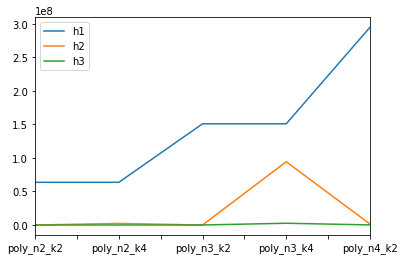

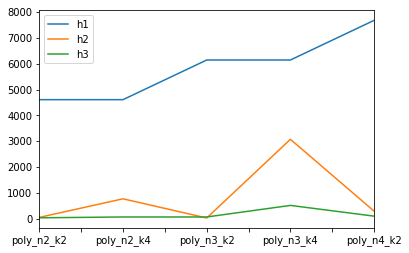

In [944]:
vc_dim.plot()
train_par.plot()
plt.show()